In [50]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pylab as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_predict

<h1>Trabalho de séries temporais<h1>

<h3>Neste modelo, iremos utilizar dados sobre o CPI dos E.U.A, o Consumer Price Index, que é uma métrica importante para o cálculo da Inflaçäo</h3>

In [70]:
df = pd.read_csv("files/inflation.csv")
df.head()

,Yearmon,CPI
0,01-01-1913,9.8
1,01-02-1913,9.8
2,01-03-1913,9.8
3,01-04-1913,9.8
4,01-05-1913,9.7


In [71]:
df.dtypes

Yearmon     object
CPI        float64
dtype: object

<h3> Primeiramente, iremos verificar os tipos de dados presentes em nosso arquivo .csv </h3>

In [72]:
dateparse = lambda months: datetime.strptime(months, '%d-%m-%Y')
df = pd.read_csv('files/inflation.csv', parse_dates= ['Yearmon'], index_col='Yearmon', date_parser=dateparse)


<h4>Após isso, iremos formatar os dados referentes á datas em formato Datetime e tornando a coluna Yearmon o nosso índice </h4>

In [73]:
df.head()

,CPI
Yearmon,
1913-01-01,9.8
1913-02-01,9.8
1913-03-01,9.8
1913-04-01,9.8
1913-05-01,9.7


In [85]:
st = df['CPI']
st[10]

10.1

<p>Criaremos uma variável chamada st que recebe como parâmetro um valor que será retornado relacionado ao CPI. </p>

In [75]:
st['1998']

Yearmon
1998-01-01    161.6
1998-02-01    161.9
1998-03-01    162.2
1998-04-01    162.5
1998-05-01    162.8
1998-06-01    163.0
1998-07-01    163.2
1998-08-01    163.4
1998-09-01    163.6
1998-10-01    164.0
1998-11-01    164.0
1998-12-01    163.9
Name: CPI, dtype: float64

In [76]:
print(st.index.max())
print(st.index.min)

2021-07-01 00:00:00
<bound method Index.min of DatetimeIndex(['1913-01-01', '1913-02-01', '1913-03-01', '1913-04-01',
               '1913-05-01', '1913-06-01', '1913-07-01', '1913-08-01',
               '1913-09-01', '1913-10-01',
               ...
               '2020-10-01', '2020-11-01', '2020-12-01', '2021-01-01',
               '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01',
               '2021-06-01', '2021-07-01'],
              dtype='datetime64[ns]', name='Yearmon', length=1303, freq=None)>


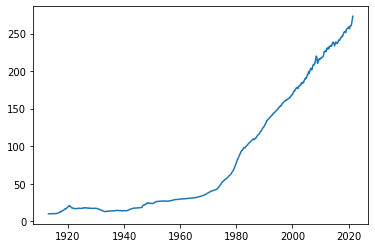

In [77]:
plt.plot(st)

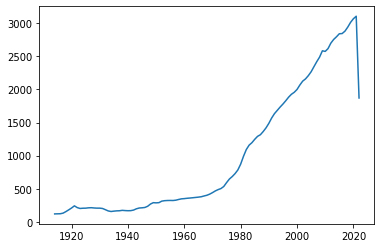

In [78]:
st_ano = st.resample('A').sum()
plt.plot(st_ano)

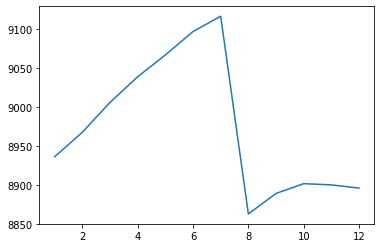

In [79]:
st_mes = st.groupby([lambda x: x.month]).sum()
plt.plot(st_mes)

In [60]:
decomposicao = seasonal_decompose(st)
tendencia = decomposicao.trend
sazonal = decomposicao.seasonal
aleatorio = decomposicao.resid

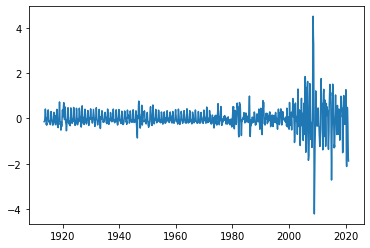

In [80]:
plt.plot(aleatorio)

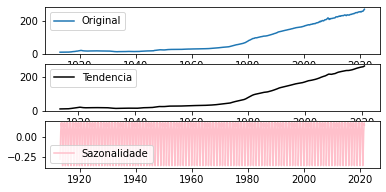

In [81]:
plt.subplot(4,1,1)
plt.plot(st, label='Original')
plt.legend(loc="best")

plt.subplot(4,1,2)
plt.plot(tendencia, label="Tendencia", color='black')
plt.legend(loc="best")

plt.subplot(4,1,3)
plt.plot(sazonal, label="Sazonalidade", color='pink')
plt.legend(loc="best")




In [63]:
modelo_auto = auto_arima(st, m=12, seasonal=True)
modelo_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                 1303
Model:             SARIMAX(0, 2, 3)x(2, 0, [1, 2], 12)   Log Likelihood                -325.154
Date:                                 Thu, 09 Jun 2022   AIC                            666.308
Time:                                         18:55:04   BIC                            707.675
Sample:                                              0   HQIC                           681.829
                                                - 1303                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4191      0.014    -29.388      0.000      -0.447      -0.391
ma.L2         -0.3914      0.014    -27.087      0.000      -0.420      -0.363
ma.L3         -0.1413      0.018     -7.669      0.000      -0.177      -0.105
ar.S.L12       1.4872      0.088     16.863      0.000       1.314       1.660
ar.S.L24      -0.5031      0.089     -5.675      0.000      -0.677      -0.329
ma.S.L12      -1.4926      0.085    -17.552      0.000      -1.659      -1.326
ma.S.L24       0.5850      0.078      7.486      0.000       0.432       0.738
sigma2         0.0962      0.002     54.714      0.000       0.093       0.100
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              8659.71
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):              11.17   Skew:                            -0.94
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
proximos_12 = modelo_auto.predict(n_periods=24)
proximos_12

array([273.80088078, 274.49010265, 274.78119856, 274.66140394,
       274.59319477, 275.49762339, 276.56095456, 277.59772011,
       278.4248114 , 279.27874892, 279.99558706, 280.38624242,
       280.91512252, 281.57523228, 281.93723545, 281.87217718,
       281.8710448 , 282.82993381, 283.92869747, 284.95669892,
       285.81125515, 286.74882792, 287.65628913, 288.21449107])

In [82]:
modelo_arima = ARIMA(st, order=(2,1,2), freq=st.index.inferred_freq)
modelo_treinado = modelo_arima.fit()
modelo_treinado.summary()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CPI   No. Observations:                 1303
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -459.542
Date:                Thu, 09 Jun 2022   AIC                            929.085
Time:                        20:10:34   BIC                            954.943
Sample:                    01-01-1913   HQIC                           938.786
                         - 07-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3205      0.023     57.606      0.000       1.276       1.365
ar.L2         -0.3208      0.023    -14.090      0.000      -0.365      -0.276
ma.L1         -0.7023      0.024    -29.803      0.000      -0.749      -0.656
ma.L2         -0.2777      0.021    -13.158      0.000      -0.319      -0.236
sigma2         0.1184      0.002     53.873      0.000       0.114       0.123
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):              6711.65
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):              14.42   Skew:                            -0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [83]:
previsoes = modelo_treinado.forecast(steps=12)
previsoes

2021-08-01    273.697384
2021-09-01    274.243839
2021-10-01    274.742646
2021-11-01    275.225997
2021-12-01    275.704221
2022-01-01    276.180637
2022-02-01    276.656308
2022-03-01    277.131576
2022-04-01    277.606552
2022-05-01    278.081270
2022-06-01    278.555743
2022-07-01    279.029973
Freq: MS, Name: predicted_mean, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.f

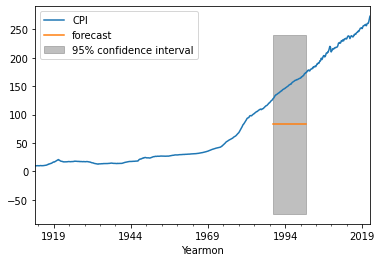

In [84]:
import statsmodels.api as sm 

res = sm.tsa.ARIMA(st).fit()
fig, ax = plt.subplots()
ax = st.loc['1913':].plot(ax=ax)
fig = plot_predict(sm.tsa.ARIMA(st).fit(),'1990', '2000', dynamic=True, ax=ax, plot_insample=False)
plt.show()